In [4]:
import pandas as pd
pd.set_option('display.max_columns',50)
import pandas_profiling as pp
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, CategoricalNB
import sklearn.metrics as sklm
from sklearn.metrics import roc_curve, auc
import numpy as np
import numpy.random as nr
import math
import os
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Xử lí dữ liệu

In [55]:
COLUMNS=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
        'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'count', 'srv_count',
        'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
        'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
        'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
        'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
        'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
        'dst_host_srv_rerror_rate', 'label' ]
CONTINUOS_COLUMNS=['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 
                   'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                   'srv_count', 'srv_serror_rate', 'srv_rerror_rate', 'srv_diff_host_rate']
CATEGORICAL_COLUMNS=['protocol_type', 'service', 'flag']
NUMERIC_COLUMNS=['duration', 'src_bytes', 'dst_bytes', 'land',
         'wrong_fragment', 'urgent', 'count',
         'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
         'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
         'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
         'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
DATA_PATH='data/mydata.csv'
DTYPES={x: float for x in COLUMNS}
DTYPES.update({'protocol_type': str, 'service': str, 'flag': str })
print(DTYPES)

{'duration': <class 'float'>, 'protocol_type': <class 'str'>, 'service': <class 'str'>, 'flag': <class 'str'>, 'src_bytes': <class 'float'>, 'dst_bytes': <class 'float'>, 'land': <class 'float'>, 'wrong_fragment': <class 'float'>, 'urgent': <class 'float'>, 'count': <class 'float'>, 'srv_count': <class 'float'>, 'serror_rate': <class 'float'>, 'srv_serror_rate': <class 'float'>, 'rerror_rate': <class 'float'>, 'srv_rerror_rate': <class 'float'>, 'same_srv_rate': <class 'float'>, 'diff_srv_rate': <class 'float'>, 'srv_diff_host_rate': <class 'float'>, 'dst_host_count': <class 'float'>, 'dst_host_srv_count': <class 'float'>, 'dst_host_same_srv_rate': <class 'float'>, 'dst_host_diff_srv_rate': <class 'float'>, 'dst_host_same_src_port_rate': <class 'float'>, 'dst_host_srv_diff_host_rate': <class 'float'>, 'dst_host_serror_rate': <class 'float'>, 'dst_host_srv_serror_rate': <class 'float'>, 'dst_host_rerror_rate': <class 'float'>, 'dst_host_srv_rerror_rate': <class 'float'>, 'label': <class

In [56]:
# data prepairing
df=pd.read_csv(DATA_PATH)
df.drop('Unnamed: 0', axis=1, inplace=True)
print(df.shape)
df.sample(20)

(1306829, 29)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1097417,0,tcp,http,SF,349,725,0,0,0,22,22,0.00,0.00,0.0,0.0,1.0,0.0,0.00,118,255,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.0,normal.
793920,17051,udp,domain_u,SF,95,45,0,0,0,1,1,0.00,0.00,0.0,0.0,1.0,0.0,0.00,161,155,0.96,0.02,0.31,0.00,0.00,0.00,0.00,0.0,normal.
1194031,16,tcp,telnet,SF,107,3981,0,0,0,1,1,0.00,0.00,0.0,0.0,1.0,0.0,0.00,150,3,0.02,0.04,0.01,0.00,0.00,0.00,0.00,0.0,normal.
385454,0,tcp,ftp,S1,254,58,0,0,0,49792,49791,1.00,1.00,0.0,0.0,1.0,0.0,0.00,100,100,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.0,tcp_syn_flood
145276,8,tcp,http,RSTO,878,290,0,0,0,9355,9355,0.56,0.56,0.0,0.0,1.0,0.0,0.00,100,100,1.00,0.00,0.00,0.00,0.62,0.62,0.00,0.0,tcp_syn_flood
747586,0,tcp,http,SF,250,2873,0,0,0,2,2,0.00,0.00,0.0,0.0,1.0,0.0,0.00,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,normal.
868799,0,tcp,http,SF,308,1075,0,0,0,7,7,0.00,0.00,0.0,0.0,1.0,0.0,0.00,117,104,0.89,0.03,0.01,0.00,0.00,0.00,0.00,0.0,normal.
658914,0,tcp,http,SF,347,1521,0,0,0,12,14,0.00,0.00,0.0,0.0,1.0,0.0,0.14,55,255,1.00,0.00,0.02,0.02,0.00,0.00,0.00,0.0,normal.
902209,0,tcp,http,SF,247,6485,0,0,0,9,9,0.00,0.00,0.0,0.0,1.0,0.0,0.00,27,40,1.00,0.00,0.04,0.08,0.00,0.00,0.00,0.0,normal.
33316,0,tcp,ssh,OTH,54,0,0,0,0,7498,7498,0.00,0.00,0.0,0.0,1.0,0.0,0.00,100,100,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,tcp_rst_flood


### Overview dữ liệu

In [57]:
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,1.306829e+06,1306829,1306829,1306829,1.306829e+06,1.306829e+06,1.306829e+06,1306829.0,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1306829
unique,NaN,3,48,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal.
freq,NaN,1095317,690144,924144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,838531
mean,9.318902e+01,NaN,NaN,NaN,2.210200e+03,5.310519e+03,6.121688e-06,0.0,1.094252e-04,1.276612e+04,1.277142e+04,1.468684e-01,1.476681e-01,2.850288e-02,2.869900e-02,9.722151e-01,1.447238e-02,1.125166e-01,1.183254e+02,1.634914e+02,9.007747e-01,2.796476e-02,7.995975e-02,3.621589e-02,1.512185e-01,1.510145e-01,2.999667e-02,2.909862e-02,NaN
std,9.364135e+02,NaN,NaN,NaN,2.691077e+05,5.501706e+05,2.474198e-03,0.0,3.384538e-02,2.708369e+04,2.708028e+04,3.373151e-01,3.379261e-01,1.655953e-01,1.643653e-01,1.486381e-01,1.015168e-01,2.660390e-01,8.353586e+01,8.551983e+01,2.512313e-01,1.162929e-01,2.137319e-01,1.358793e-01,3.438946e-01,3.441297e-01,1.622717e-01,1.580533e-01,NaN
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,0.000000e+00,NaN,NaN,NaN,1.520000e+02,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,1.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,0.000000e+00,NaN,NaN,NaN,2.430000e+02,2.770000e+02,0.000000e+00,0.0,0.000000e+00,1.200000e+01,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,1.310000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,0.000000e+00,NaN,NaN,NaN,3.080000e+02,1.350000e+03,0.000000e+00,0.0,0.000000e+00,1.140100e+04,1.140000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e-02,1.800000e+02,2.550000e+02,1.000000e+00,0.000000e+00,3.000000e-02,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


### Loại bỏ duplicate rows  
Data bị duplicate có thể gây ảnh hưởng xấu tới mô hình học máy. Vì vậy cần loại bỏ những dòng bị duplicate.

In [58]:
# try to drop duplicate samples
df.drop_duplicates(inplace=True)
df.describe(include='all')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
count,1.306829e+06,1306829,1306829,1306829,1.306829e+06,1.306829e+06,1.306829e+06,1306829.0,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1.306829e+06,1306829
unique,NaN,3,48,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,tcp,http,SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal.
freq,NaN,1095317,690144,924144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,838531
mean,9.318902e+01,NaN,NaN,NaN,2.210200e+03,5.310519e+03,6.121688e-06,0.0,1.094252e-04,1.276612e+04,1.277142e+04,1.468684e-01,1.476681e-01,2.850288e-02,2.869900e-02,9.722151e-01,1.447238e-02,1.125166e-01,1.183254e+02,1.634914e+02,9.007747e-01,2.796476e-02,7.995975e-02,3.621589e-02,1.512185e-01,1.510145e-01,2.999667e-02,2.909862e-02,NaN
std,9.364135e+02,NaN,NaN,NaN,2.691077e+05,5.501706e+05,2.474198e-03,0.0,3.384538e-02,2.708369e+04,2.708028e+04,3.373151e-01,3.379261e-01,1.655953e-01,1.643653e-01,1.486381e-01,1.015168e-01,2.660390e-01,8.353586e+01,8.551983e+01,2.512313e-01,1.162929e-01,2.137319e-01,1.358793e-01,3.438946e-01,3.441297e-01,1.622717e-01,1.580533e-01,NaN
min,0.000000e+00,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,0.000000e+00,NaN,NaN,NaN,1.520000e+02,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,1.000000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,0.000000e+00,NaN,NaN,NaN,2.430000e+02,2.770000e+02,0.000000e+00,0.0,0.000000e+00,1.200000e+01,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,1.310000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,0.000000e+00,NaN,NaN,NaN,3.080000e+02,1.350000e+03,0.000000e+00,0.0,0.000000e+00,1.140100e+04,1.140000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.000000e-02,1.800000e+02,2.550000e+02,1.000000e+00,0.000000e+00,3.000000e-02,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN


### Chi tiết dữ liệu

In [59]:
report = pp.ProfileReport(df, minimal=True)
report.to_notebook_iframe()

Quan sát ta thấy cột "wrong_fragment" là hằng số =0. Vì vậy nó không có ý nghĩa đối với mô hình và cần được loại bỏ.

In [60]:
df.drop('wrong_fragment', axis=1, inplace=True)
COLUMNS.remove('wrong_fragment')
CONTINUOS_COLUMNS.remove('wrong_fragment')
NUMERIC_COLUMNS.remove('wrong_fragment')

Các dạng tấn công và tỉ lệ của từng dạng tấn công trong dataset

In [61]:
df['label'].unique()

array(['normal.', 'tcp_rst_flood', 'other', 'icmp_ping_scan',
       'tcp_null_scan', 'http_slow', 'tcp_fin_flood', 'tcp_syn_flood',
       'icmp_flood', 'udp_flood', 'ping_of_death', 'udp_scan',
       'http_flood', 'tcp_connection_scan', 'guest_passwd'], dtype=object)

In [62]:
df['label'].value_counts()/df.shape[0]

normal.                0.641653
tcp_syn_flood          0.162572
udp_flood              0.080793
tcp_rst_flood          0.055403
tcp_fin_flood          0.021499
http_flood             0.018588
other                  0.004868
tcp_null_scan          0.004843
tcp_connection_scan    0.004786
udp_scan               0.003844
icmp_ping_scan         0.000944
guest_passwd           0.000136
http_slow              0.000067
ping_of_death          0.000002
icmp_flood             0.000002
Name: label, dtype: float64

Nếu theo góc độ multi-classification, xuất hiện hiện tượng số lượng samples trong từng class không đồng đều nhau (class imballancing). Tuy nhiên nếu theo góc độ binary classification, tỉ lệ normal:attack là 64:36, cân bằng ở mức chấp nhận được.

Gán nhãn binary (0-1)

In [63]:
df['label_binary']=df['label'].apply(lambda x: 0 if x=='normal.' else 1)

In [64]:
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,urgent,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,label_binary
1235300,0,tcp,http,SF,305,353,0,0,15,15,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,normal.,0
474708,0,tcp,ftp,S1,254,58,0,0,139046,139044,1.0,1.0,0.0,0.0,1.0,0.0,0.0,100,100,1.0,0.0,0.00,0.00,1.0,1.0,0.0,0.0,tcp_syn_flood,1
118654,0,tcp,http,OTH,134,0,0,0,10835,10835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100,100,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,tcp_fin_flood,1
643501,0,tcp,http,SF,303,3058,0,0,9,9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,255,1.0,0.0,0.11,0.05,0.0,0.0,0.0,0.0,normal.,0
36382,0,tcp,ssh,OTH,54,0,0,0,10564,10564,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100,100,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,tcp_rst_flood,1


In [65]:
df['label_binary'].value_counts()

0    838531
1    468298
Name: label_binary, dtype: int64

## Visualize dữ liệu

In [66]:
print(COLUMNS)
df.info()

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'urgent', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306829 entries, 0 to 1306828
Data columns (total 29 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   duration                     1306829 non-null  int64  
 1   protocol_type                1306829 non-null  object 
 2   service                      1306829 non-null  object 
 3   flag                         1306829 non-null  object 
 4   src_bytes       

### Histogram theo từng feature

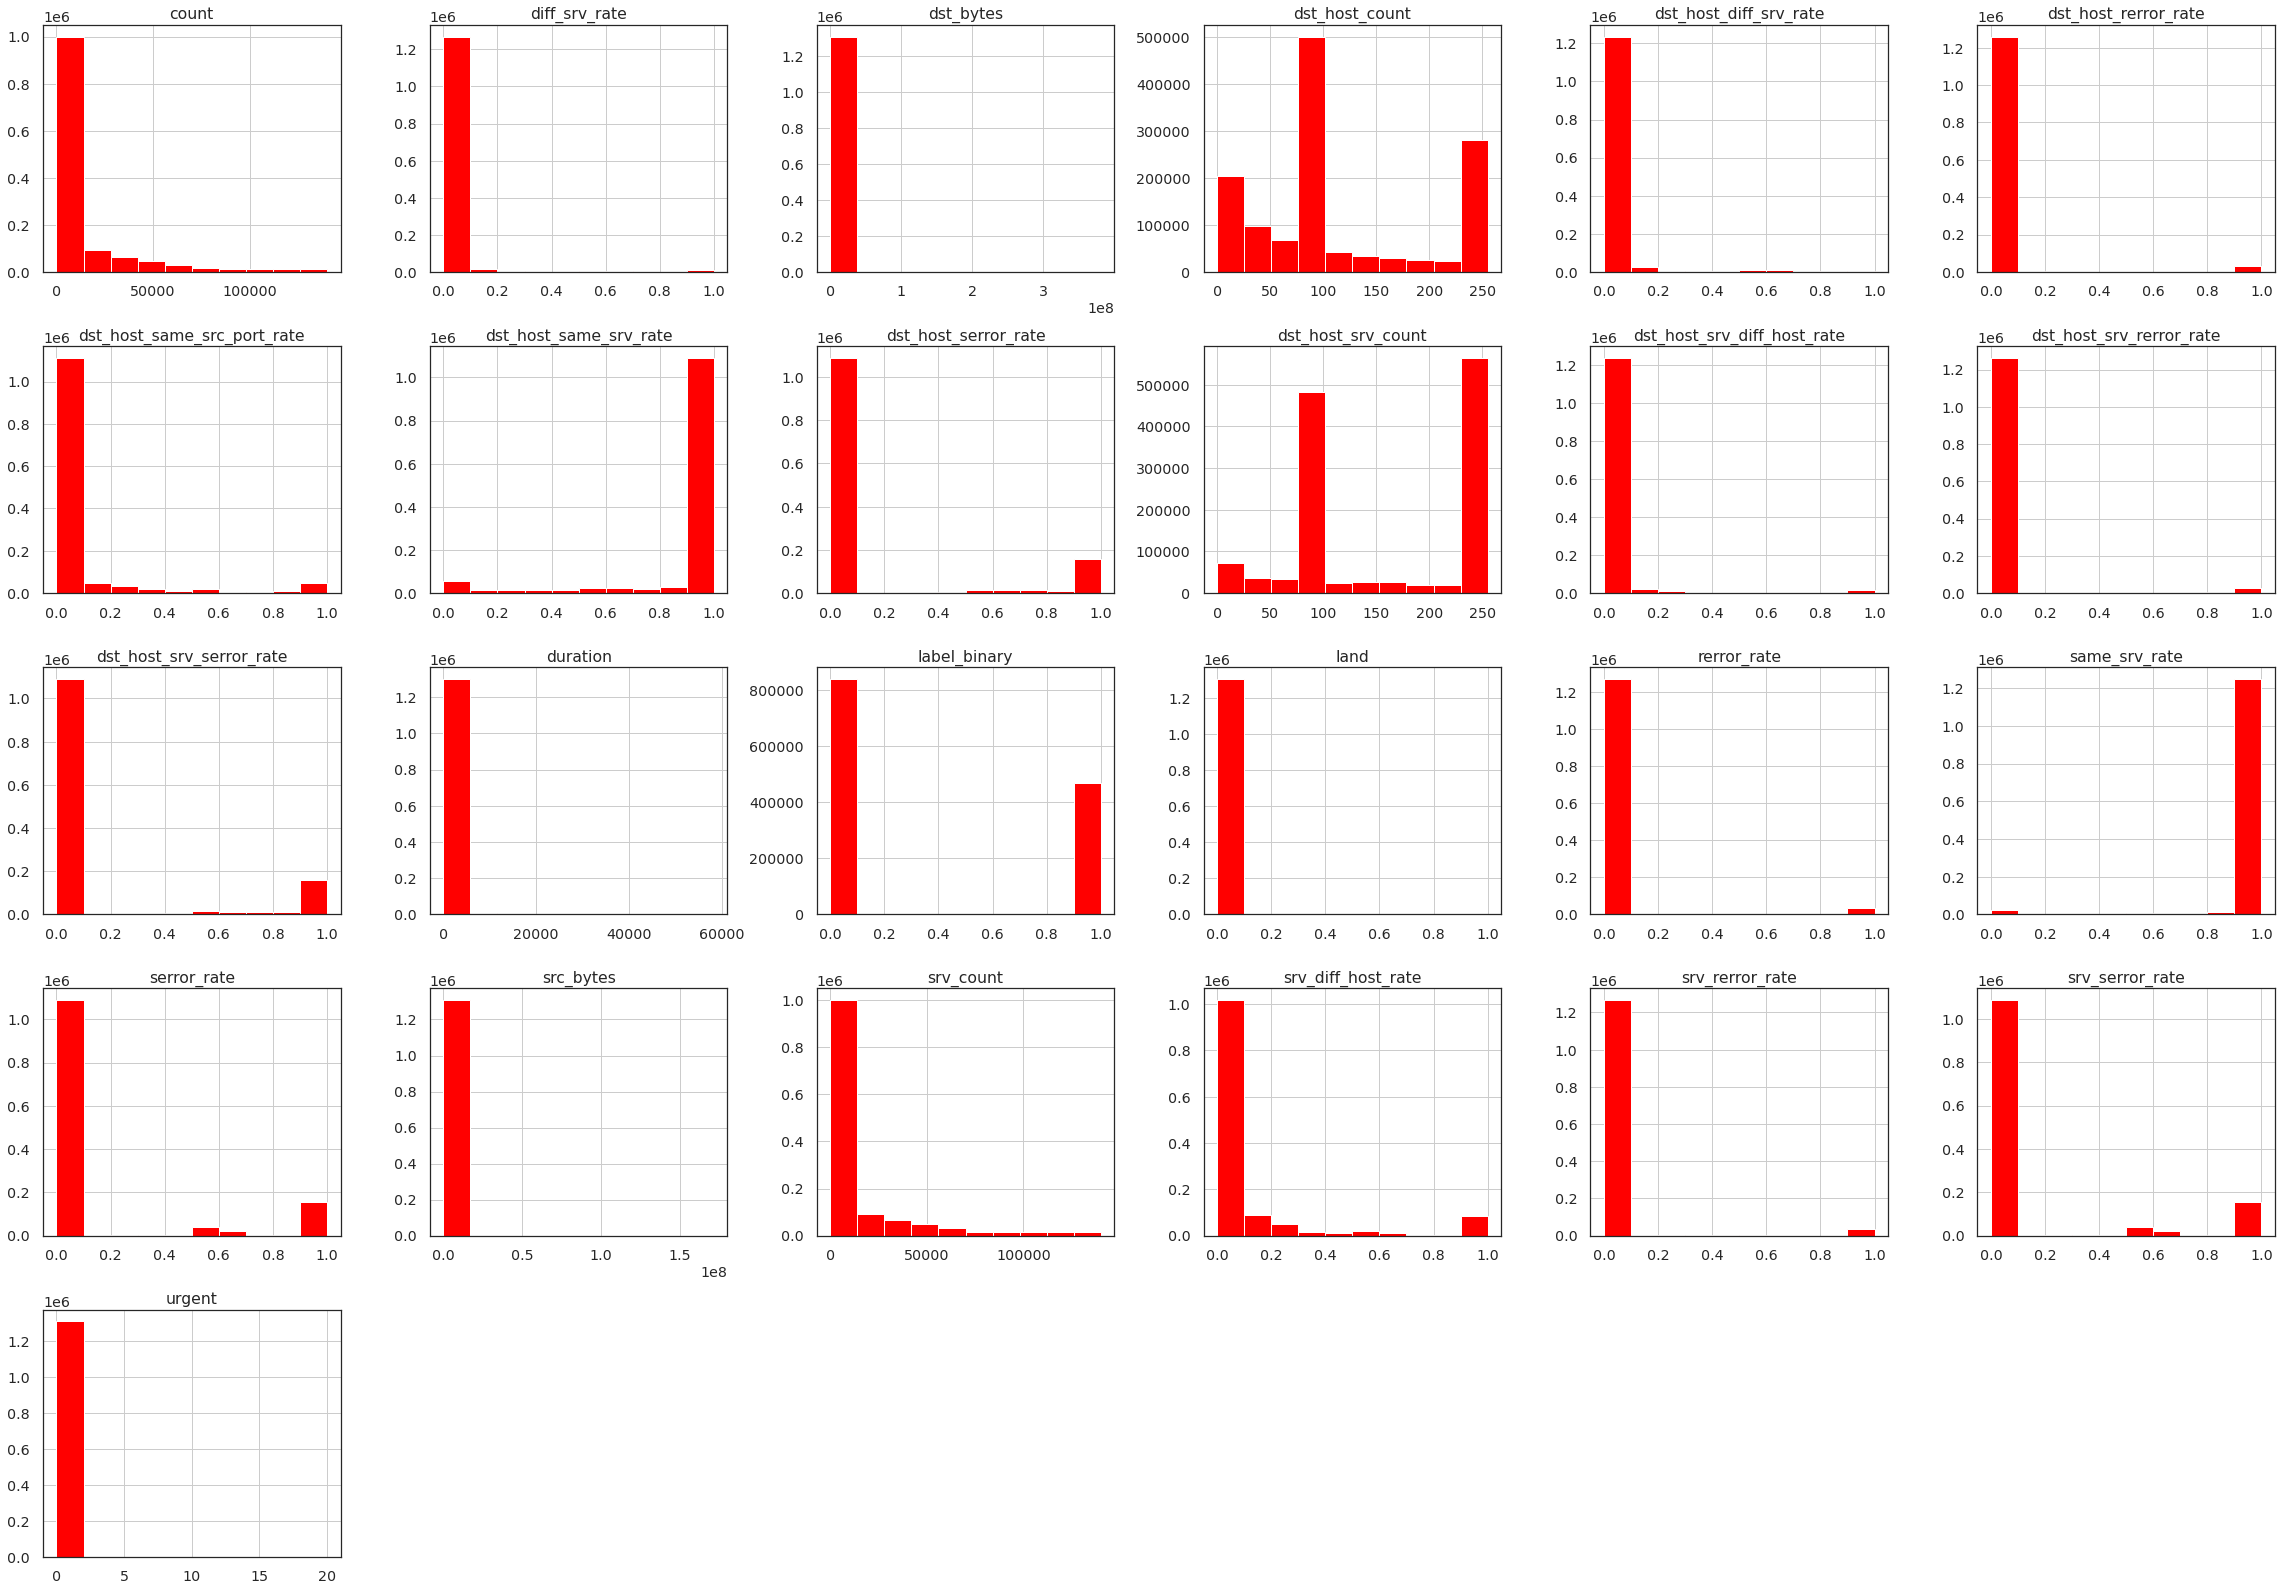

In [67]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(40,40)})
ax=df.hist(bins=10,color='red', layout=(7,6) )

### Histogram đối với từng thuộc tính theo từng nhãn  
Điều này giúp ta có nhận định trực quan về các features ảnh hưởng tới kết quả như thế nào, xác định features nào là quan trọng, hay không quan trọng.

duration


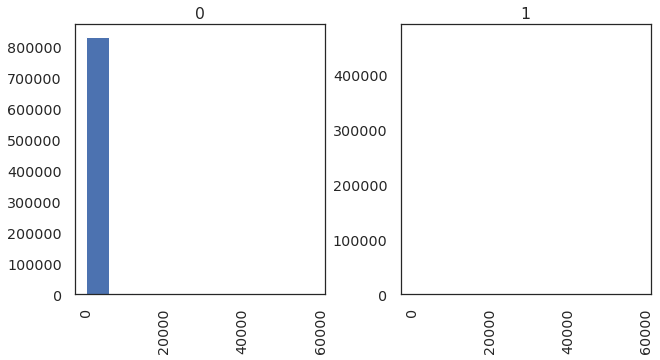

protocol_type


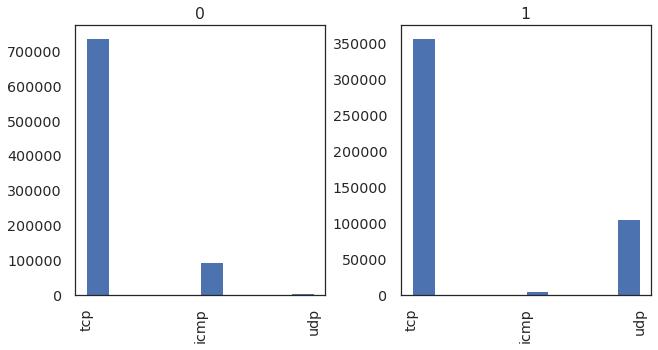

service


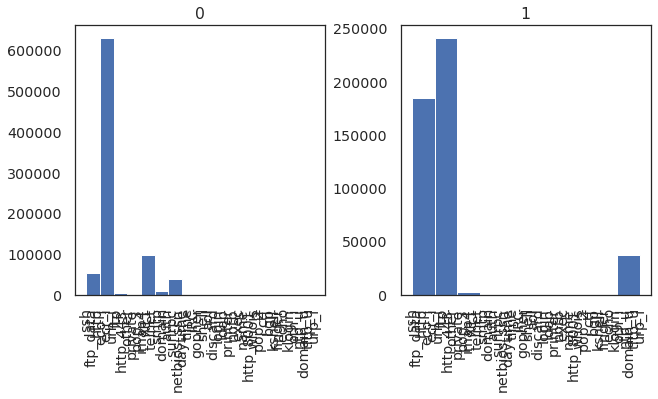

flag


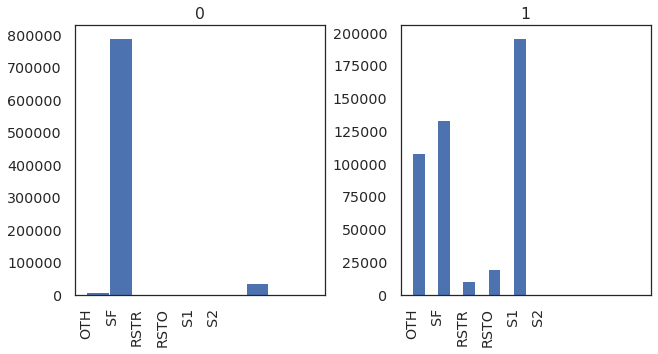

src_bytes


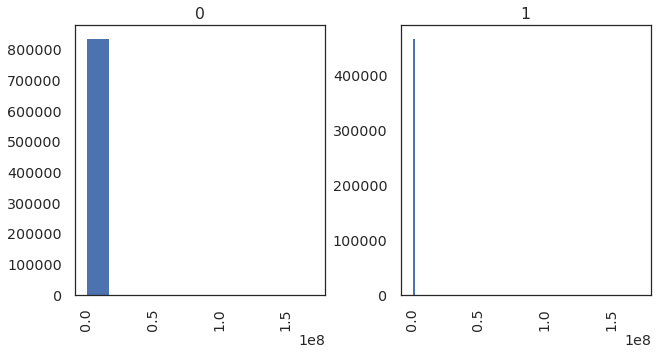

dst_bytes


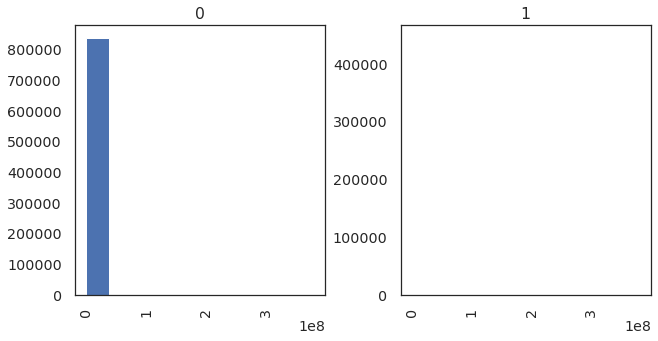

land


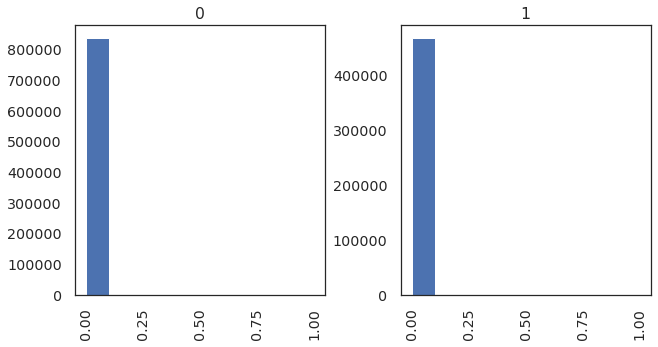

urgent


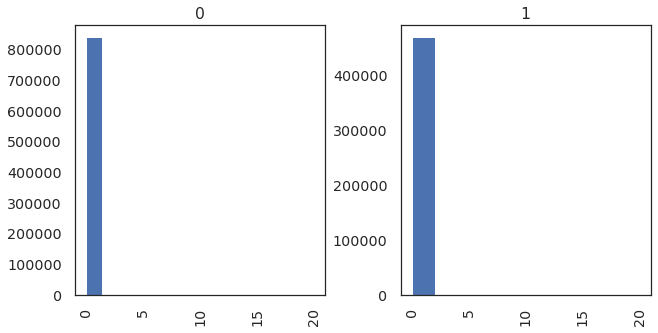

count


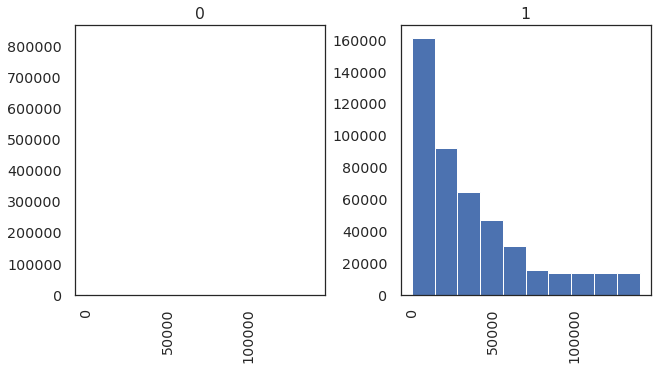

srv_count


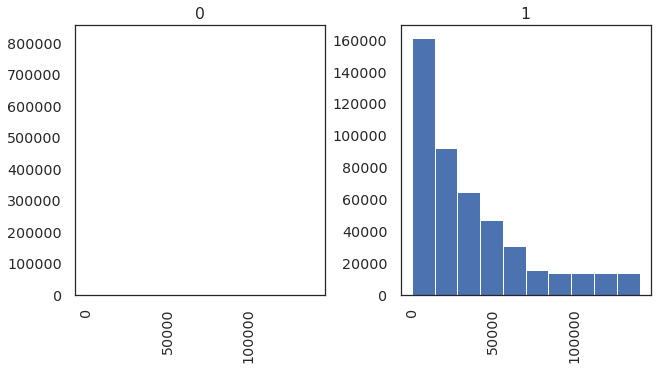

serror_rate


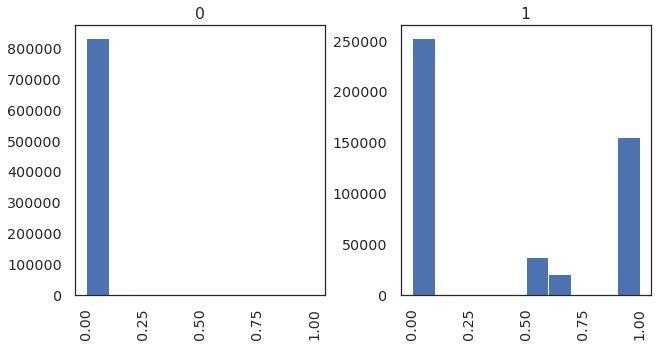

srv_serror_rate


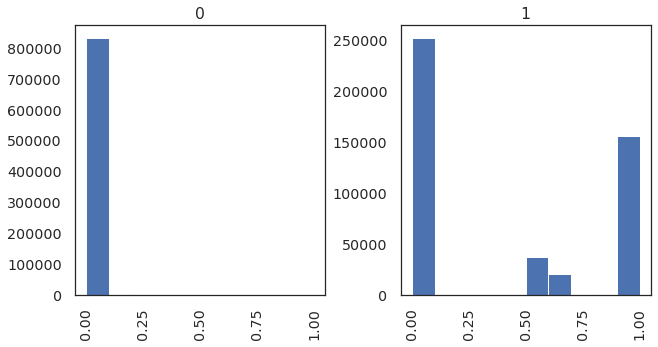

rerror_rate


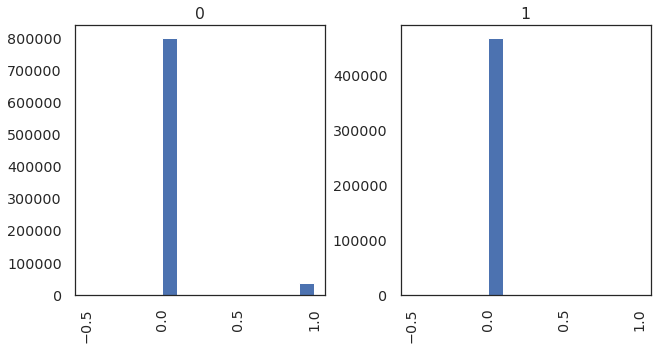

srv_rerror_rate


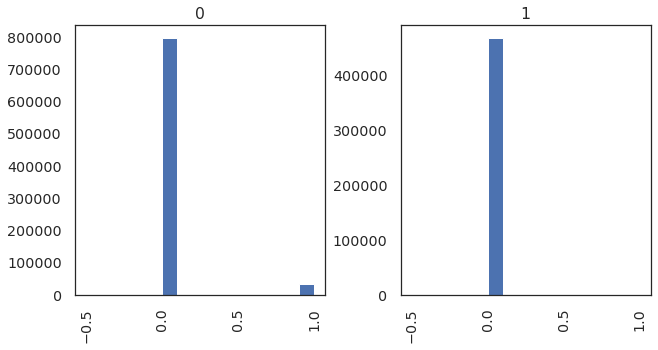

same_srv_rate


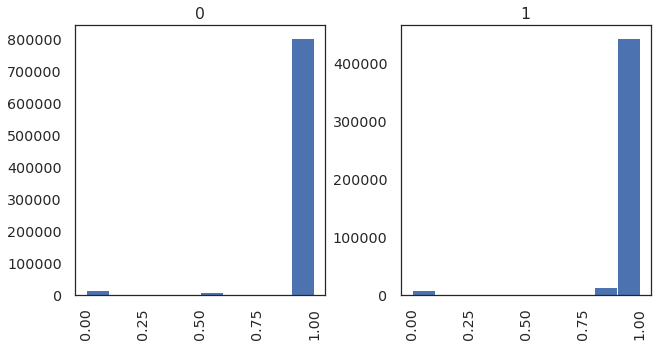

diff_srv_rate


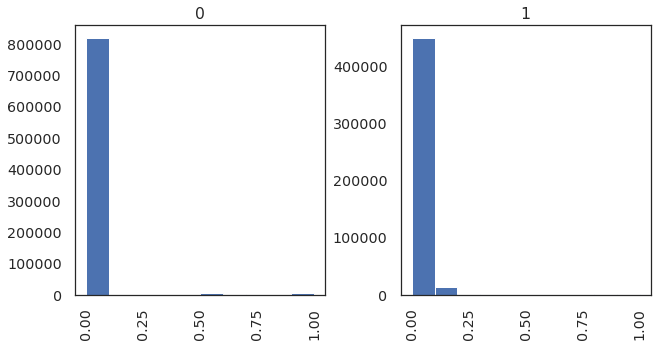

srv_diff_host_rate


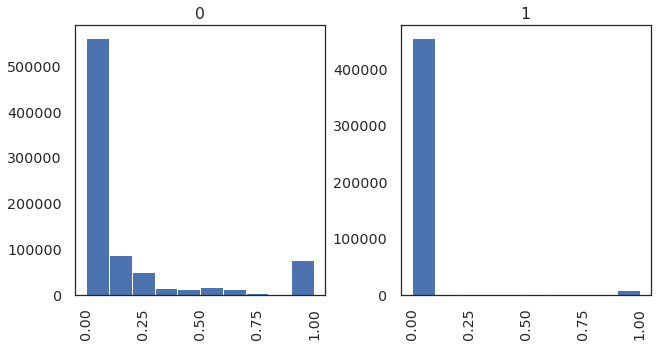

dst_host_count


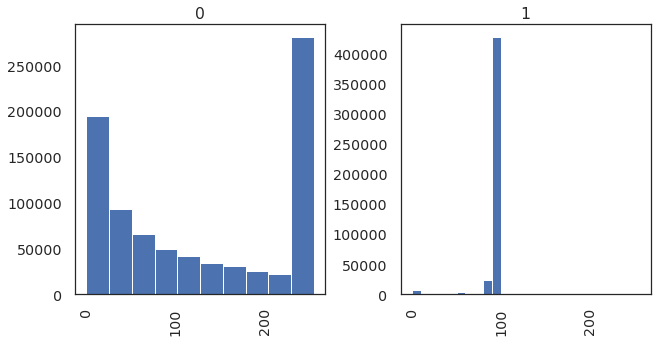

dst_host_srv_count


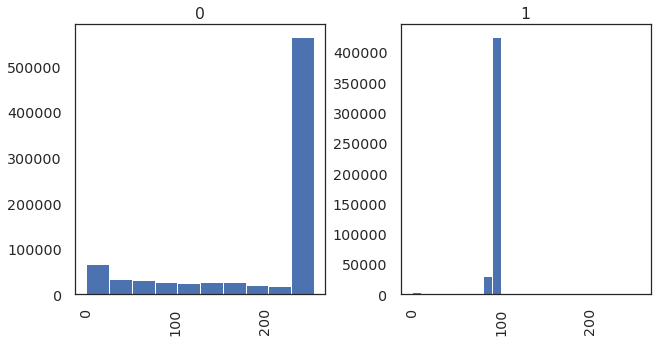

dst_host_same_srv_rate


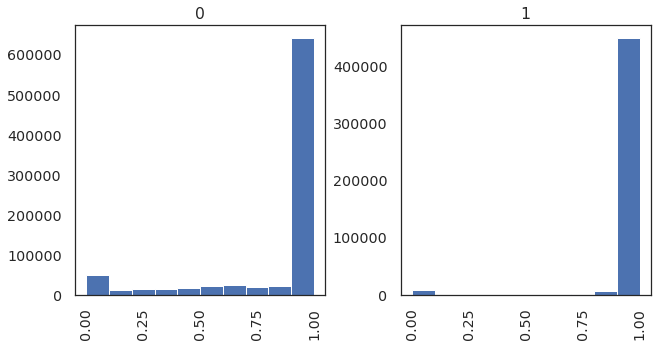

dst_host_diff_srv_rate


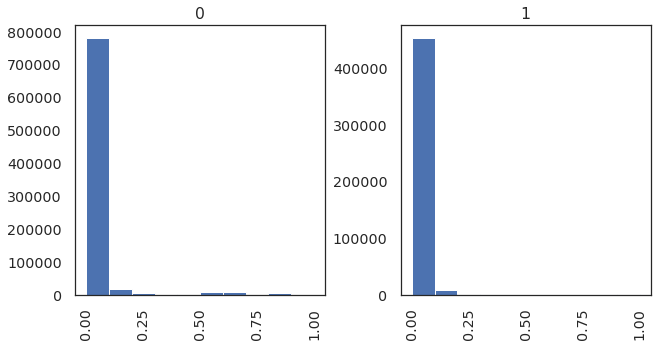

dst_host_same_src_port_rate


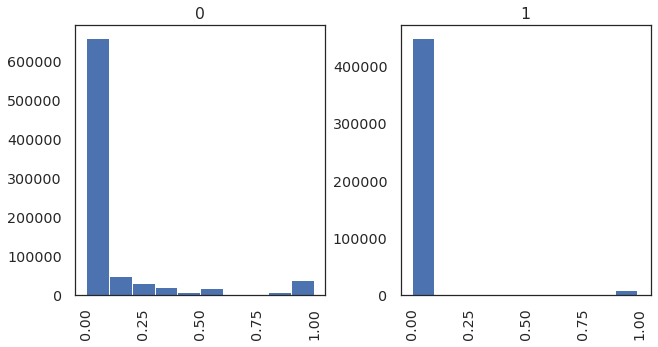

dst_host_srv_diff_host_rate


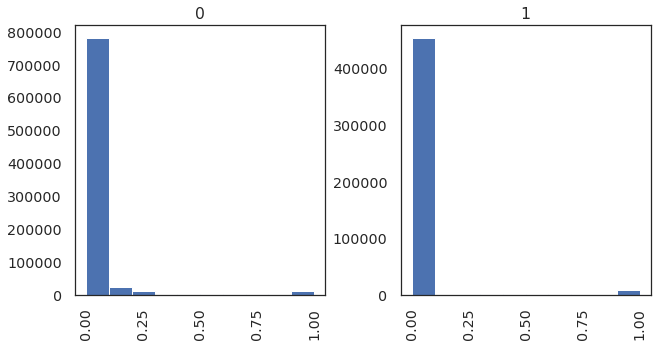

dst_host_serror_rate


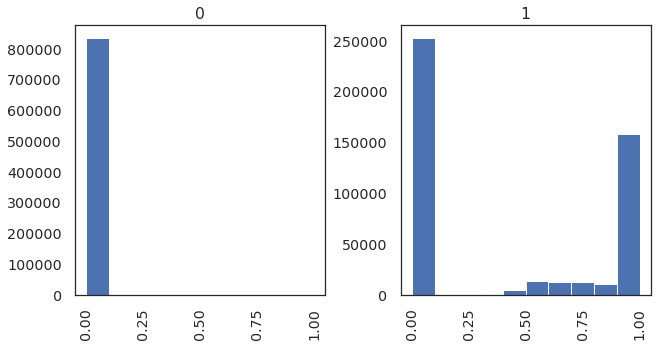

dst_host_srv_serror_rate


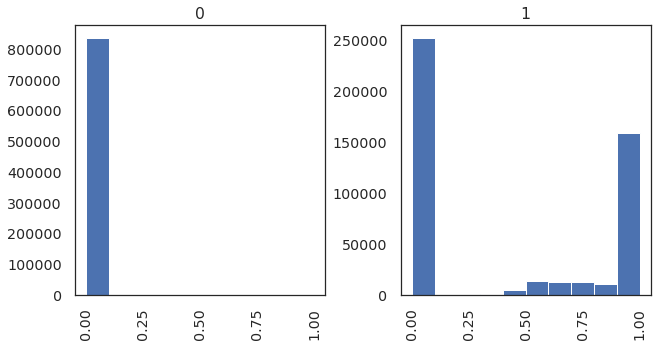

dst_host_rerror_rate


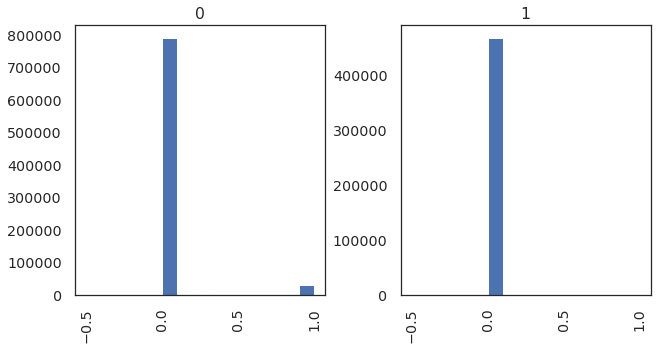

dst_host_srv_rerror_rate


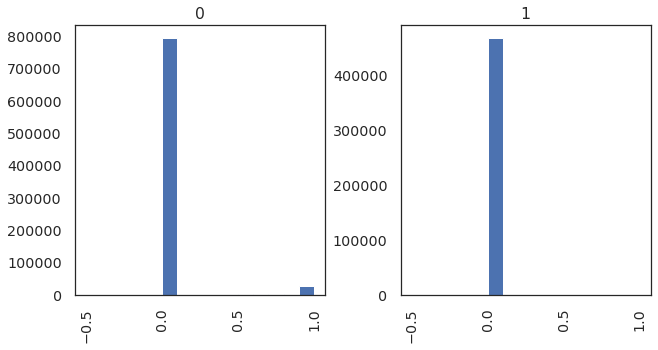

In [68]:
for col in COLUMNS[:-1]:
    print(col)
    df.hist(column=col, by='label_binary', grid=True, xrot=90,figsize=(10,5), sharex=True)
    plt.show()

Nhận xét:
- Một số feature nhận xét rằng có thể ảnh hưởng lớn tới đầu ra (label): service, flag, src_bytes, wrong_fragment, logged_in, lnum_compromised, lnum_root, lnum_access_files, count, serror_rate, srv_serror_rate, same_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_serror_rate, dst_host_srv_serror_rate
- Các feature thống kê (time-based traffic features) và content features có distribution khác nhau khá lớn đối với 2 class. Có thể đoán rằng đây là những feature quan trọng, là các feature được tổng hợp và mang đặc tính domain knowledge cao hơn.
- Time-based traffic features nổi bật vì hầu hết các tấn công thuộc loại DOS attack.


Với các cột mà giá trị là số, ta xem xét tới các giá trị:
- Trung vị
- Phân vị 25% (Q1), phân vị 75% (Q3)
- 2 giá trị Q1-1.5 x IQR và Q3+1.5 x IQR
- Các thành phần outliers nằm ngoài vùng 2 giá trị trên .

### Boxplot: xem xét phân phối dữ liệu, tìm ra ngoại lệ (outliers)
Boxplot ứng với từng feature

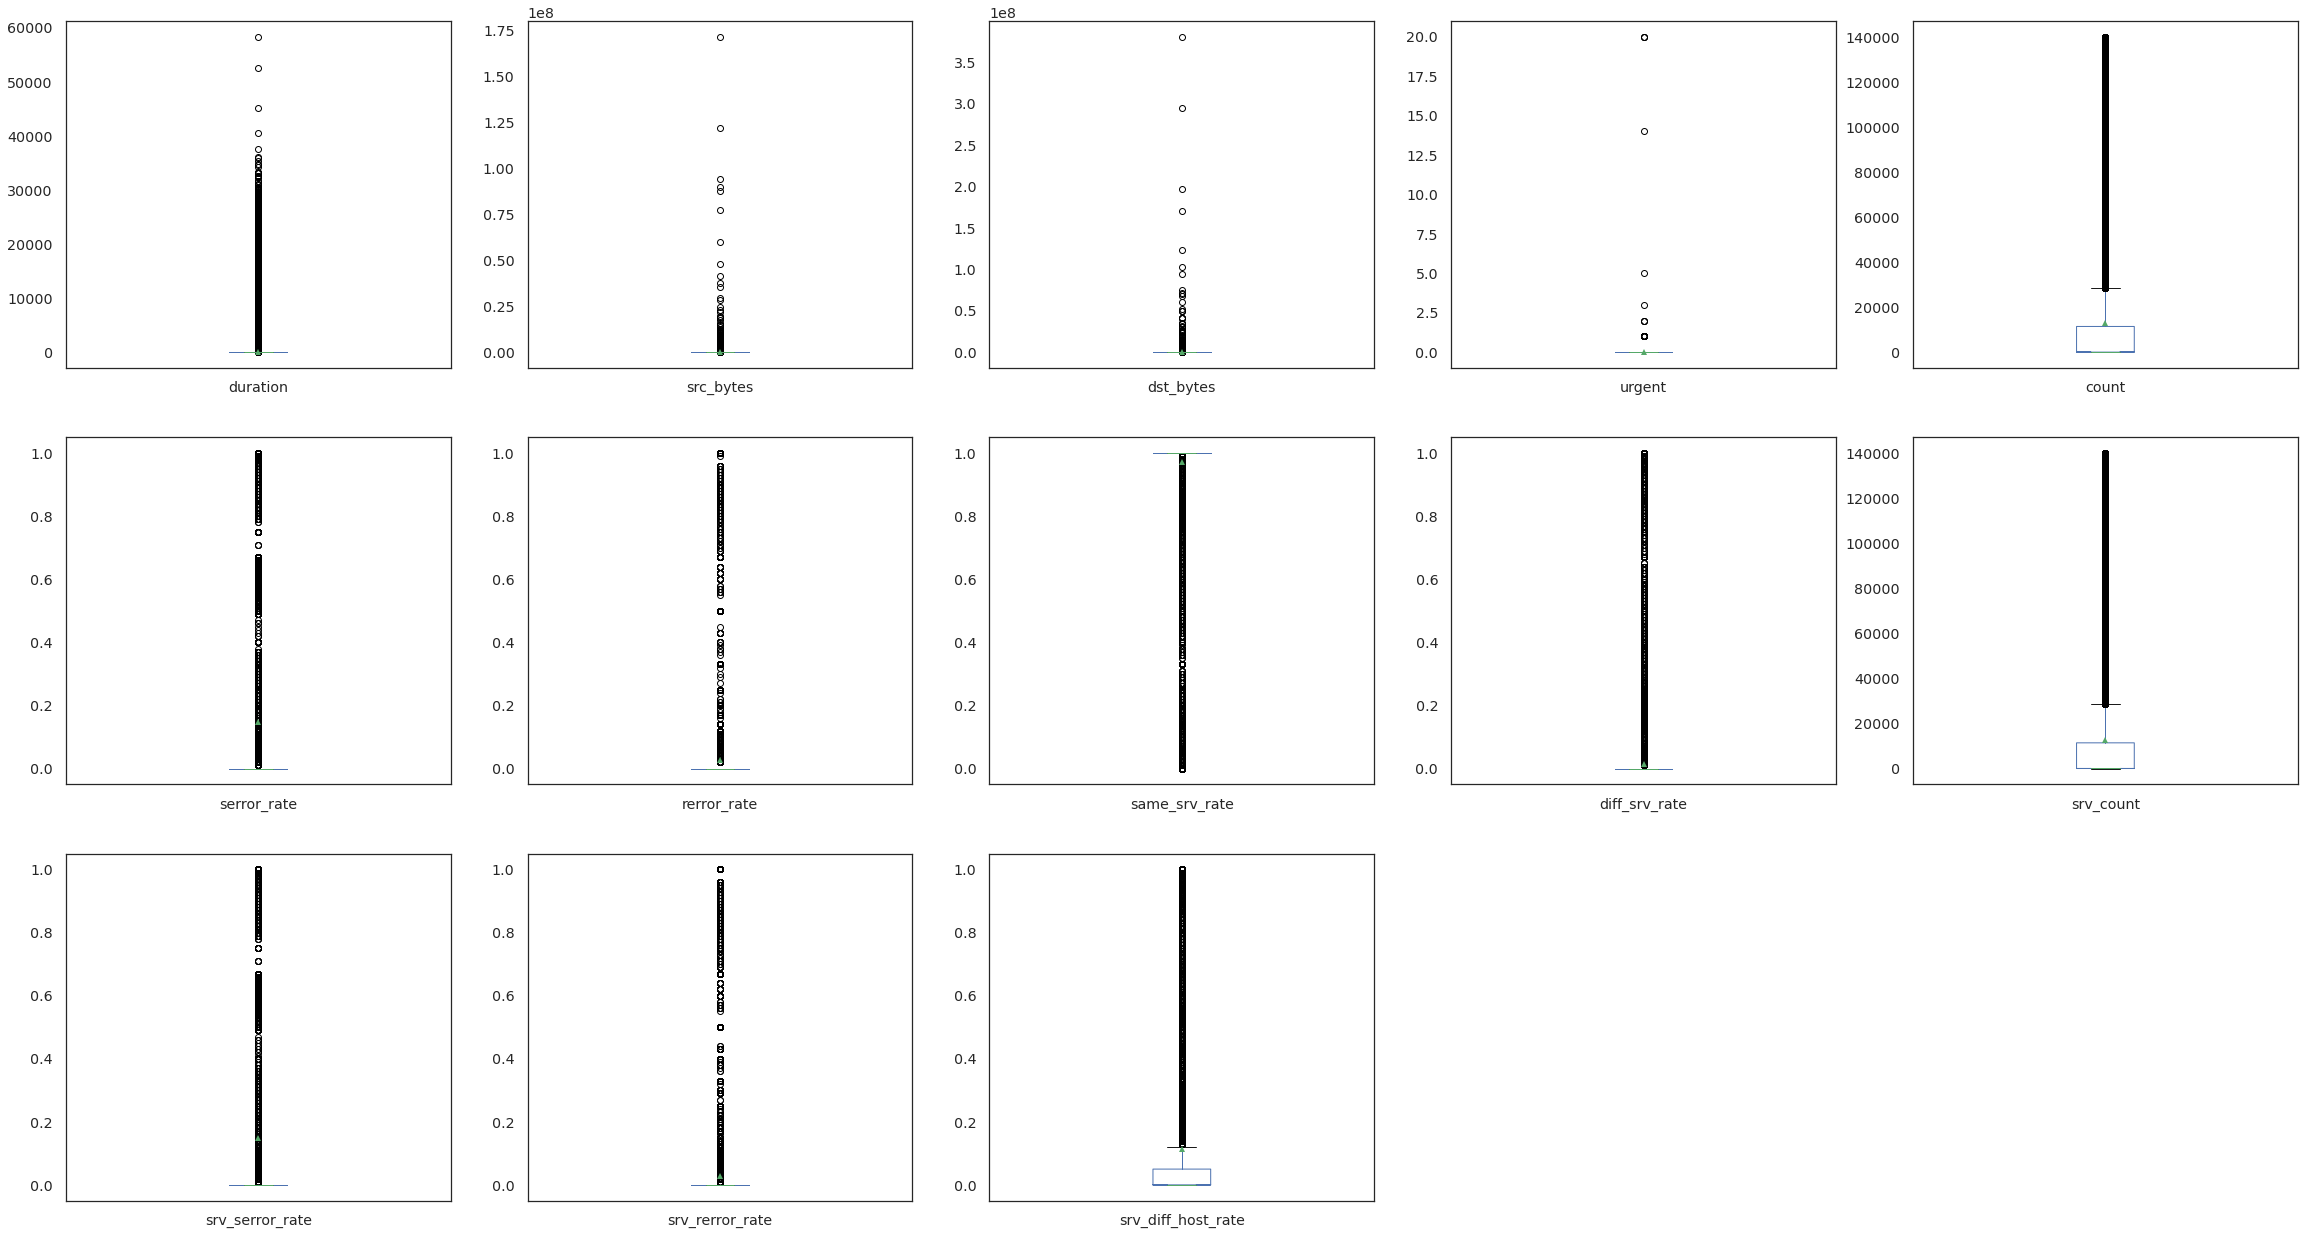

In [69]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(40, 60)})
# show outliers
ax=df.plot(y=CONTINUOS_COLUMNS, kind = 'box',subplots = True, layout = (8,5),
        sharex = False, sharey = False, grid=False, showcaps=True, showmeans=True, notch=True)

Nhận xét: dữ liệu phân bố không đồng đều, có rất nhiều điểm ngoại lệ

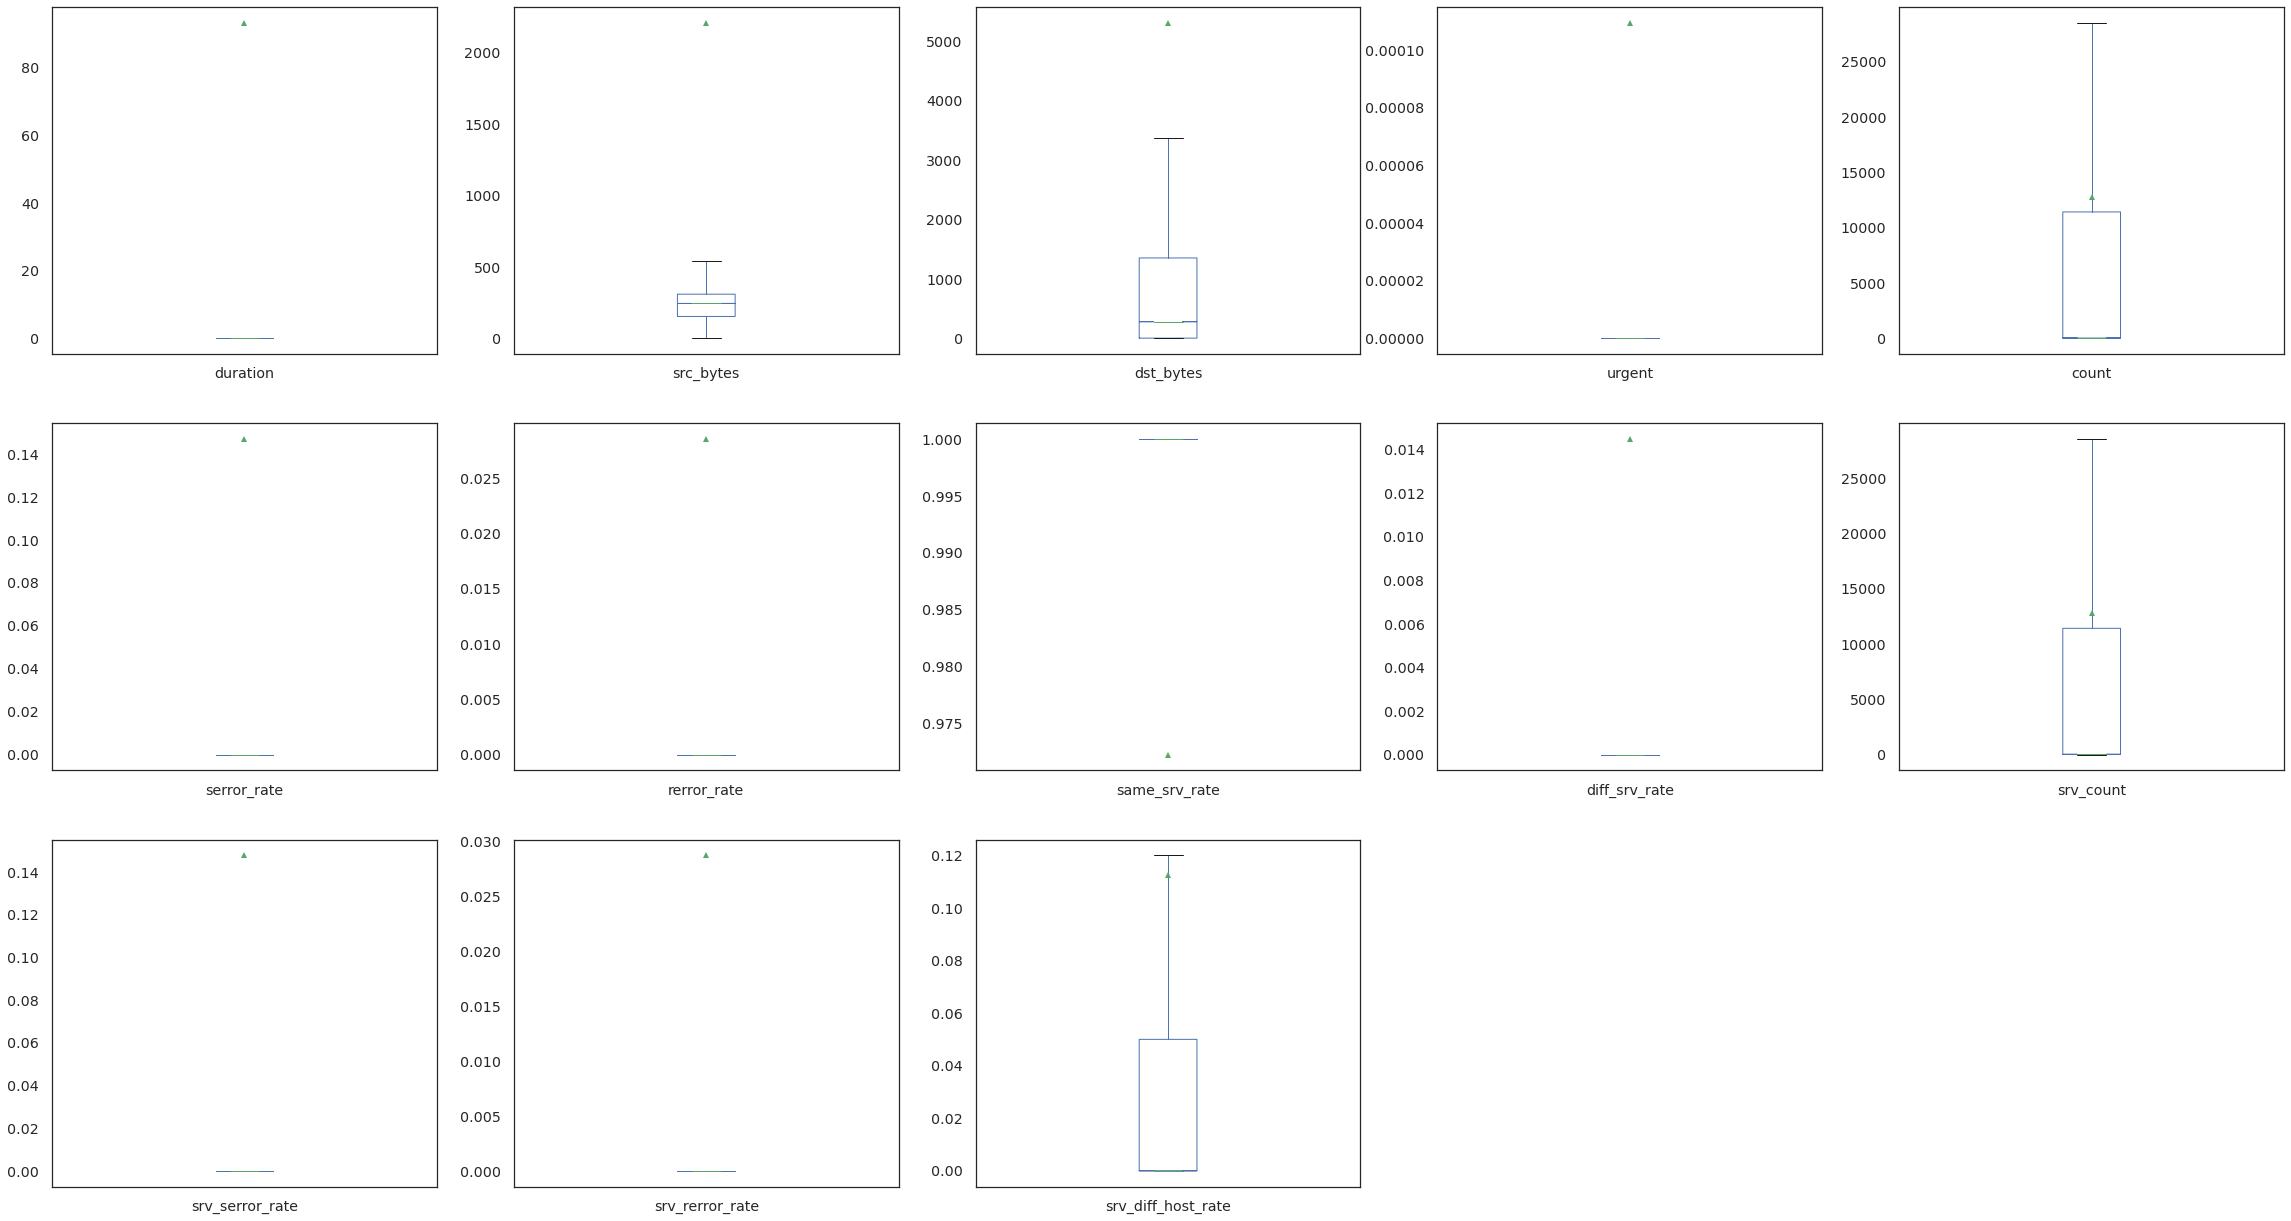

In [70]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(40, 60)})
# not show outliers
ax=df.plot(y=CONTINUOS_COLUMNS, kind = 'box',subplots = True, layout = (8,5),
        sharex = False, sharey = False, grid=False, showcaps=True, showmeans=True, notch=True, sym='')

## Train-validation-test set

In [71]:
data=df.to_numpy()
X=data[:, :-2]
Y=data[:,-2:]
print(X.shape, Y.shape)
print(Y)

(1306829, 27) (1306829, 2)
[['normal.' 0]
 ['normal.' 0]
 ['normal.' 0]
 ...
 ['normal.' 0]
 ['normal.' 0]
 ['normal.' 0]]


In [72]:
x_train_val, x_test, y_train_val, y_test=train_test_split(X, Y, test_size=0.25, random_state=42)
x_train, x_val, y_train, y_val=train_test_split(x_train_val, y_train_val, test_size=0.33, random_state=42)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(656681, 27) (656681, 2) (323440, 27) (323440, 2) (326708, 27) (326708, 2)


In [73]:
y_train_detail=y_train[:, 0]
y_train=y_train[:, 1].astype(int)
y_val_detail=y_val[:, 0]
y_val=y_val[:, 1].astype(int)
y_test_detail=y_test[:, 0]
y_test=y_test[:, 1].astype(int)
print(y_train_detail.shape, y_train.shape)
print(y_train_detail, y_train)

(656681,) (656681,)
['udp_flood' 'tcp_syn_flood' 'normal.' ... 'normal.' 'normal.' 'normal.'] [1 1 0 ... 0 0 0]


## Chuẩn hóa dữ liệu

Các categorical features sẽ được encode dưới dạng one-hot vector để đưa vào mô hình.

In [74]:
encoder1=OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train_1= encoder1.fit_transform(x_train[:, 1:2])
x_val_1=encoder1.transform(x_val[:, 1:2])
x_test_1=encoder1.transform(x_test[:, 1:2])

encoder2=OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train_2= encoder2.fit_transform(x_train[:, 2:3])
x_val_2=encoder2.transform(x_val[:, 2:3])
x_test_2=encoder2.transform(x_test[:, 2:3])

encoder3=OneHotEncoder(handle_unknown='ignore', sparse=False)
x_train_3= encoder3.fit_transform(x_train[:, 3:4])
x_val_3=encoder3.transform(x_val[:, 3:4])
x_test_3=encoder3.transform(x_test[:, 3:4])

x_train=np.concatenate([x_train[:,0:1], x_train_1, x_train_2, x_train_3, x_train[:,4:]], axis=1)
x_val=np.concatenate([x_val[:,0:1], x_val_1, x_val_2, x_val_3, x_val[:,4:]], axis=1)
x_test=np.concatenate([x_test[:,0:1], x_test_1, x_test_2, x_test_3, x_test[:,4:]], axis=1)

print(x_train.shape, x_val.shape, x_test.shape)

(656681, 85) (323440, 85) (326708, 85)


In [75]:
print(x_train[0,:])

[0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 1.0 0.0 152 0 0 0 9015 9015 0.0 0.0 0.0 0.0 1.0 0.0
 0.0 100 100 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]


Chuẩn hóa z-score toàn bộ feature

In [76]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train=scaler.transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)
print('Example of features vector')
print(x_train[0,:])

Example of features vector
[-1.00113818e-01 -8.48591472e-02 -2.27292597e+00  2.33464574e+00
 -2.13430884e-02 -1.46026976e-02 -3.49036153e-03 -4.31248992e-02
 -3.49036153e-03 -3.26493177e-03 -3.26493177e-03 -2.75936677e-03
 -6.98085063e-03 -2.02437632e-01 -3.90234877e-03 -3.55957584e-02
 -1.96708733e-02 -3.02273715e-03 -6.20665987e-02 -3.69900647e-01
 -1.73342000e-01 -3.02273715e-03 -1.05784531e+00 -7.04811629e-02
 -3.70209028e-03 -5.51879657e-03 -3.70209028e-03 -3.26493177e-03
 -5.51879657e-03 -3.70209028e-03 -3.49036153e-03 -4.27481540e-03
 -5.37905343e-03  5.98237842e+00 -5.71658457e-02 -3.28002807e-01
 -3.02273715e-03 -2.66196946e-02 -4.09282103e-03 -9.33829563e-02
 -2.75936677e-03 -4.09282103e-03 -2.80158393e-01 -2.43367672e-01
 -3.90234877e-03 -4.09435350e-02 -3.70209028e-03 -2.13739306e-03
 -1.12431827e-02 -1.13107186e-02 -4.58734482e-02 -4.27481540e-03
 -3.13843895e-01 -1.69244521e-01 -1.26804944e-01 -9.33331651e-02
 -1.68773953e-02 -4.20256732e-01 -1.16425258e-02 -7.50647205e-0

## Metrics
Ở đây, metrics mà ta quan tâm tới là precision-recall và F1-score.  
$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$  
$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$
số giá trị i chính xác trên số giá trị i thực tế  
$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$
số giá trị i chính xác trên số giá trị i dự đoán  
$$F1-score = 2 * \frac{precision * recall}{precision + recall}$$

In [77]:
def evaluate(labels, scores, roc=True, labels_detail=None):
    """Print metrics included Confusion matrix, accuracy, Precision, Recall, F1 score per class."""
    # metrics = sklm.precision_recall_fscore_support(labels, scores)
    labels=labels.astype(np.float32)
    scores2=(scores>0.5).astype(np.float32).reshape(-1,)

    print('Classification report:')
    report = sklm.classification_report(labels, scores2)
    print(report)

    # print confusion matrix
    conf = sklm.confusion_matrix(labels, scores2)
    print('Confusion matrix:')
    print(conf)

    # plot confusion matrix
    n_conf=sklm.confusion_matrix(labels, scores2, normalize='true')
    df_conf = pd.DataFrame(conf, index = ['Actual:Negative', 'Actual: Positive'],
                    columns = ['Predicted: Negative', 'Predicted: Positve'])
    plt.figure(figsize = (5,5))
    sns.heatmap(df_conf, annot=True, fmt='.2f')
    plt.show()

    # plot ROC
    if roc:
        fpr, tpr, thresholds = roc_curve(labels, scores, pos_label = 1.)
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) curve')
        plt.legend(loc="lower right")
        plt.show()
    if labels_detail is not None:
        missed = labels != scores2
        print(missed)
        miss_idxs=[]
        for i in range(len(missed)):
            if missed[i]:
                miss_idxs.append(i)
        print(f'{len(miss_idxs)} sample miss-classified.')
        miss_detail=labels_detail[miss_idxs]
        miss_dict={}
        for x in miss_detail:
            if x in miss_dict:
                miss_dict[x]+=1
            else:
                miss_dict[x]=1
        print('Miss-classified samples:')
        print(miss_dict)

    
    # Manually
#     print('                 Confusion matrix')
#     print('                 Score positive    Score negative')
#     print('Actual positive    %6d' % conf[1,1] + '             %5d' % conf[1,0])
#     print('Actual negative    %6d' % conf[0,1] + '             %5d' % conf[0,0])

#     print('')
#     print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
#     print(' ')
#     print('           Positive      Negative')
#     print('Num case   %6d' % metrics[3][1] + '        %6d' % metrics[3][0])
#     print('Precision  %6.2f' % metrics[0][1] + '        %6.2f' % metrics[0][0])
#     print('Recall     %6.2f' % metrics[1][1] + '        %6.2f' % metrics[1][0])
#     print('F1         %6.2f' % metrics[2][1] + '        %6.2f' % metrics[2][0])

## Training  models

In [ ]:
!mkdir mydata_checkpoints

### Multi-layer Perceptron (MLP) với Keras

In [78]:
from keras.models import Sequential
from keras.layers import Dense,Input
from keras import Model
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
from keras import optimizers
from keras import backend as K
from keras.regularizers import l2

Using TensorFlow backend.


**Detail:**
- Keras
- Callback function:   
  -  Model checkpoint to save best model with the highest accuracy on validation set.
  -  Reduce learning rate 10 time when model is not improved after 5 epochs
  - Early stopping when model is not improved after 8 epochs
- Multi-classes cross-entropy loss function
- Training on maximum 200 epochs

In [79]:
def plot_learning_curve(history):
    sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(6,6)})
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [83]:
# callback functions on end of each epoch
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,verbose=1)
early_stop=EarlyStopping(monitor='val_loss', min_delta=0, patience=8, restore_best_weights=True, verbose=1)

Define các metric phù hợp mà ta quan tâm: precision, recall, f1-score để theo dõi trong quá trình training mô hình

In [84]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [87]:
def mlp(input_shape=(85,), num_classes=1, weight_decay=1e-3):
    # Input layer
    input = Input(input_shape)
    # x = Flatten()(input)
    x = Dense(units=128, activation='relu', kernel_regularizer=l2(weight_decay))(input)
    x = Dense(units=128, activation='relu', kernel_regularizer=l2(weight_decay))(x)
    output = Dense(units=num_classes, activation='sigmoid')(x)
    model = Model(inputs=input, outputs=output)
    return model

In [88]:
BATCH_SIZE=4096
model_checkpoint=ModelCheckpoint(f'mydata_checkpoints/best_weights_mlp.hdf5', 
                             monitor='val_loss',save_best_only=True, save_weights_only=True)

mlp_model=mlp(input_shape=(85,), num_classes=1, weight_decay=1e-3)
print(mlp_model.summary())
mlp_model.compile(optimizer=optimizers.Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])
history=mlp_model.fit(x_train, y_train, validation_data=(x_val, y_val), shuffle=True, epochs=200, workers=4,
                      batch_size=BATCH_SIZE, callbacks=[model_checkpoint, reduce_lr, early_stop])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 85)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               11008     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________
None
Train on 656681 samples, validate on 323440 samples
Epoch 1/200
656681/656681 [==============================] - 4s 6us/step - loss: 0.0818 - accuracy: 0.9921 - f1_m: 0.9886 - precision_m: 0.9876 - recall_m: 0.9899 - val_loss: 0.0263 - val_accuracy

dict_keys(['val_loss', 'val_accuracy', 'val_f1_m', 'val_precision_m', 'val_recall_m', 'loss', 'accuracy', 'f1_m', 'precision_m', 'recall_m', 'lr'])


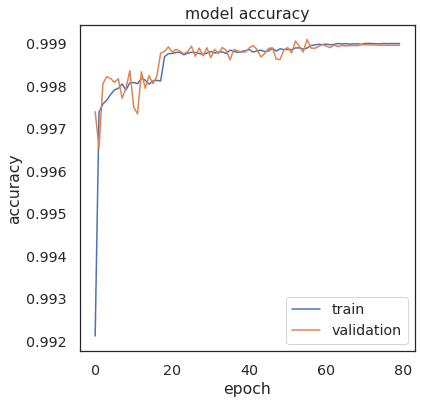

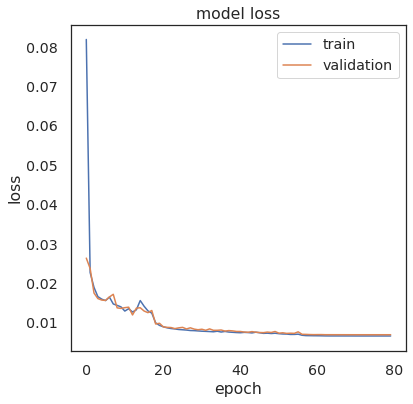

In [89]:
print(history.history.keys())
plot_learning_curve(history)

In [91]:
mlp_model.evaluate(x_val, y_val)

323440/323440 [==============================] - 28s 87us/step


[0.006842390206339994,
 0.9989550113677979,
 0.9984331130981445,
 0.9979565143585205,
 0.9990604519844055]

#### Kết quả trên test set

Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    209648
         1.0       1.00      1.00      1.00    117060

    accuracy                           1.00    326708
   macro avg       1.00      1.00      1.00    326708
weighted avg       1.00      1.00      1.00    326708

Confusion matrix:
[[209413    235]
 [   105 116955]]


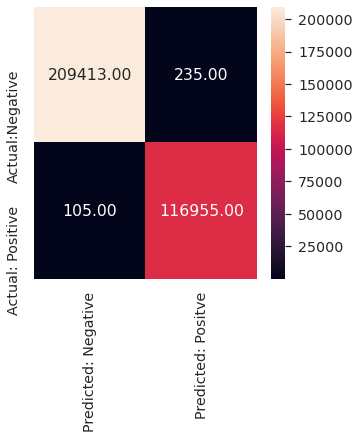

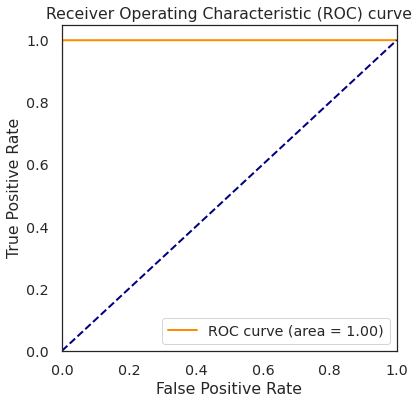

[False False False ... False False False]
340 sample miss-classified.
Miss-classified samples:
{'http_flood': 29, 'normal.': 235, 'tcp_null_scan': 29, 'other': 29, 'http_slow': 2, 'tcp_connection_scan': 6, 'udp_scan': 6, 'icmp_ping_scan': 4}


In [92]:
y_test_pred=mlp_model.predict(x_test)
evaluate(y_test, y_test_pred, labels_detail=y_test_detail)

### Logistic Regression với Keras

In [93]:
def logistic(input_shape=(85,), num_classes=1, weight_decay=1e-3):
    # Input layer
    input = Input(input_shape)
    # x = Flatten()(input)
    output = Dense(units=num_classes, activation='sigmoid')(input)
    model = Model(inputs=input, outputs=output)
    return model

In [95]:
BATCH_SIZE=4096
model_checkpoint=ModelCheckpoint(f'mydata_checkpoints/best_weights_logistic.hdf5', 
                             monitor='val_loss',save_best_only=True, save_weights_only=True)

logistic_model=logistic(input_shape=(85,), num_classes=1, weight_decay=1e-3)
print(logistic_model.summary())
logistic_model.compile(optimizer=optimizers.Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy', f1_m, precision_m, recall_m])
history=logistic_model.fit(x_train, y_train, validation_data=(x_val, y_val), shuffle=True, epochs=200, workers=4,
                      batch_size=BATCH_SIZE, callbacks=[model_checkpoint, reduce_lr, early_stop])

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 85)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 86        
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________
None
Train on 656681 samples, validate on 323440 samples
Epoch 1/200
656681/656681 [==============================] - 2s 3us/step - loss: 0.1509 - accuracy: 0.9613 - f1_m: 0.9452 - precision_m: 0.9616 - recall_m: 0.9295 - val_loss: 0.0856 - val_accuracy: 0.9733 - val_f1_m: 0.9621 - val_precision_m: 0.9815 - val_recall_m: 0.9435
Epoch 2/200
656681/656681 [==============================] - 2s 2us/step - loss: 0.0775 - accuracy: 0.9737 - f1_m: 0.9625 - precision_m: 0.9825 - recall_m: 0.9435 - val_loss: 0.0704 - val_accurac

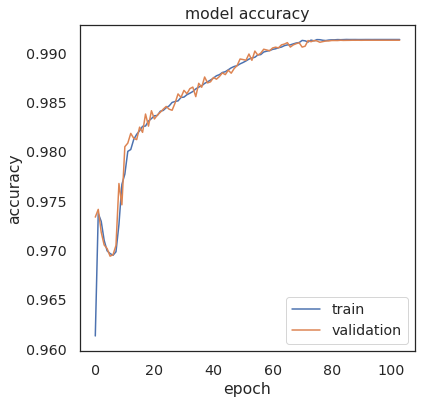

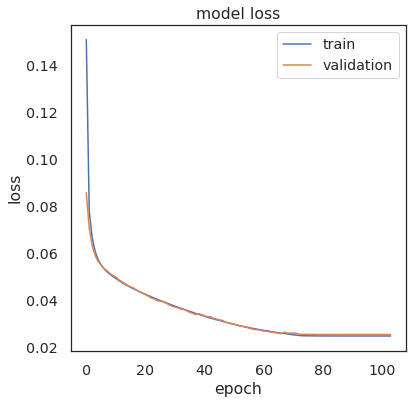

In [96]:
plot_learning_curve(history)

#### Kết quả trên test set

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    209648
         1.0       0.99      0.99      0.99    117060

    accuracy                           0.99    326708
   macro avg       0.99      0.99      0.99    326708
weighted avg       0.99      0.99      0.99    326708

Confusion matrix:
[[208415   1233]
 [  1693 115367]]


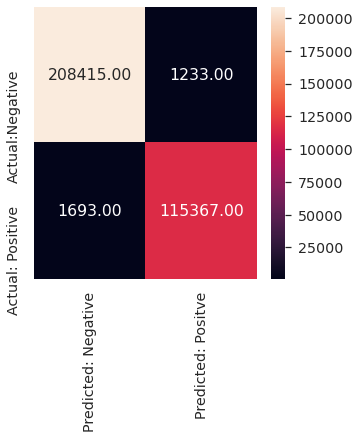

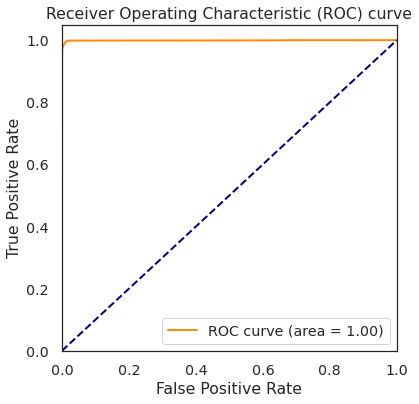

[False False False ... False False False]
2926 sample miss-classified.
Miss-classified samples:
{'normal.': 1233, 'http_flood': 1147, 'other': 97, 'udp_scan': 219, 'tcp_null_scan': 144, 'icmp_ping_scan': 80, 'tcp_connection_scan': 6}


In [97]:
y_test_pred=logistic_model.predict(x_test)
evaluate(y_test, y_test_pred, labels_detail=y_test_detail)

### Decision Tree with sklearn

In [98]:
x_train_val=np.concatenate([x_train, x_val], axis=0)
y_train_val=np.concatenate([y_train, y_val], axis=0)
test_fold = np.concatenate([
    # The training indices.
    np.full(x_train.shape[0],-1, dtype=np.int8),
    # The validation indices.
    np.zeros(x_val.shape[0], dtype=np.int8)
])
print(test_fold.shape)
ps=sklearn.model_selection.PredefinedSplit(test_fold)

(980121,)


Fitting 1 folds for each of 28 candidates, totalling 28 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  24 out of  28 | elapsed:  3.0min remaining:   29.7s
[Parallel(n_jobs=4)]: Done  28 out of  28 | elapsed:  3.1min finished


Best parameter found:
{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 5}
Best score on validation set: 0.9997712094978976
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    209648
         1.0       1.00      1.00      1.00    117060

    accuracy                           1.00    326708
   macro avg       1.00      1.00      1.00    326708
weighted avg       1.00      1.00      1.00    326708

Confusion matrix:
[[209608     40]
 [    30 117030]]


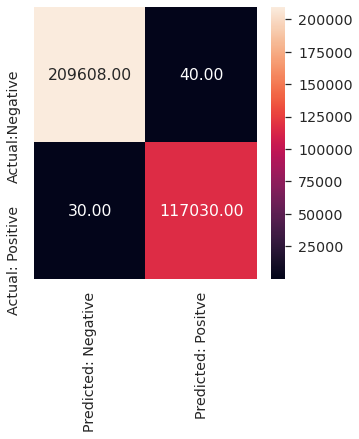

[False False False ... False False False]
70 sample miss-classified.
Miss-classified samples:
{'http_flood': 8, 'icmp_ping_scan': 2, 'normal.': 40, 'other': 2, 'udp_scan': 4, 'http_slow': 2, 'udp_flood': 5, 'tcp_null_scan': 4, 'tcp_connection_scan': 3}


In [99]:
from sklearn.tree import DecisionTreeClassifier
param_grid={'max_depth':[5, 11, 13, 17, 21, 27, 31],
    'criterion': ('gini', 'entropy'),
    'min_samples_leaf': (5, 10)
}

gs=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid,cv=ps, n_jobs=4, verbose=10)
gs.fit(x_train_val, y_train_val)
best_dt=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_dt.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

Sử dụng 3-fold cross validation cho kết qủa trên test set gần tương đồng

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   41.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.5min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  7.3min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.9min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done  84 out of  84 | elapsed:  9.1min finished


Best parameter found:
{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 5}
Best score on validation set: 0.9997469700169672
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    209648
         1.0       1.00      1.00      1.00    117060

    accuracy                           1.00    326708
   macro avg       1.00      1.00      1.00    326708
weighted avg       1.00      1.00      1.00    326708

Confusion matrix:
[[209613     35]
 [    30 117030]]


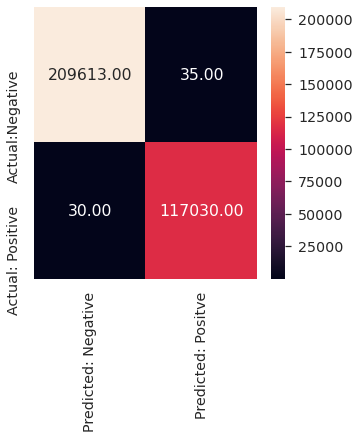

[False False False ... False False False]
65 sample miss-classified.
Miss-classified samples:
{'http_flood': 8, 'icmp_ping_scan': 2, 'normal.': 35, 'other': 2, 'tcp_connection_scan': 4, 'udp_scan': 3, 'http_slow': 2, 'udp_flood': 5, 'tcp_null_scan': 4}


In [100]:
gs=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid,cv=3, n_jobs=4, verbose=10)
gs.fit(x_train_val, y_train_val)
best_dt=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_dt.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

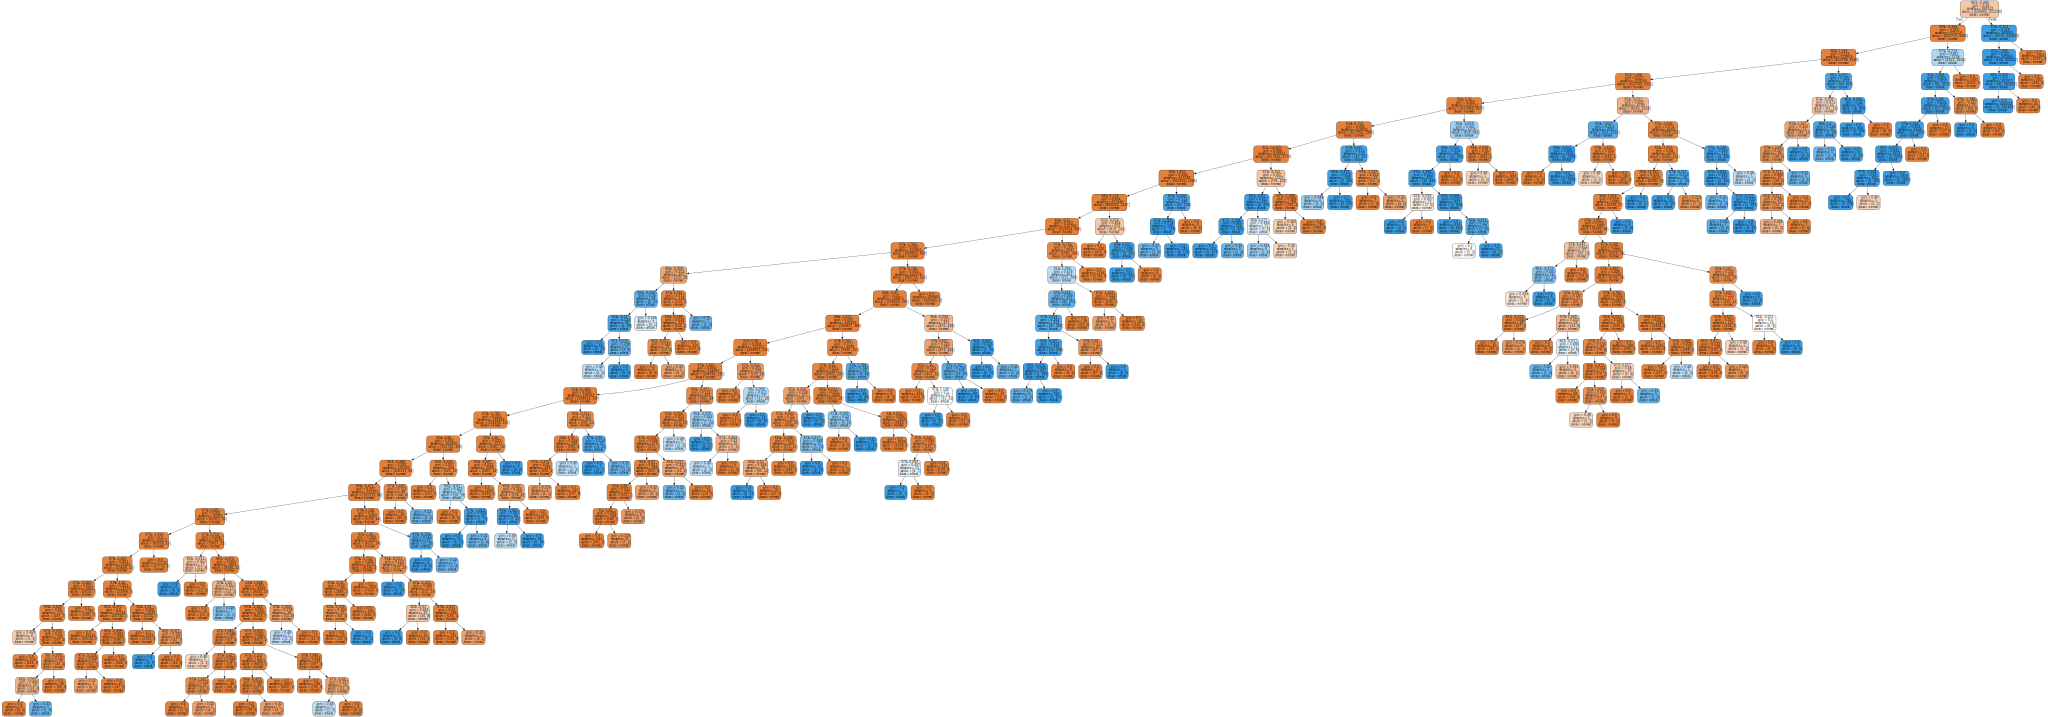

In [101]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(best_dt, out_file=None,
                                class_names=['normal', 'attack'],  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### Random Forest with sklearn

Fitting 1 folds for each of 42 candidates, totalling 42 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  9.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 12.4min
[Parallel(n_jobs=4)]: Done  40 out of  42 | elapsed: 15.3min remaining:   45.8s
[Parallel(n_jobs=4)]: Done  42 out of  42 | elapsed: 15.7min finished


Best parameter found:
{'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 5, 'n_estimators': 55}
Best score on validation set: 0.9998670541676973
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    209648
         1.0       1.00      1.00      1.00    117060

    accuracy                           1.00    326708
   macro avg       1.00      1.00      1.00    326708
weighted avg       1.00      1.00      1.00    326708

Confusion matrix:
[[209641      7]
 [    30 117030]]


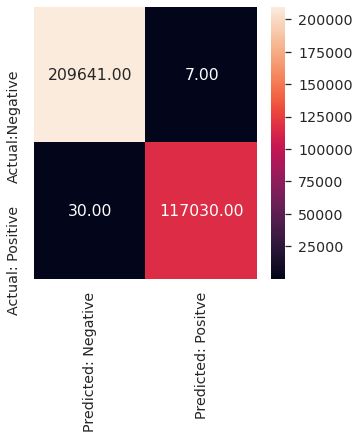

[False False False ... False False False]
37 sample miss-classified.
Miss-classified samples:
{'http_flood': 12, 'udp_scan': 2, 'normal.': 7, 'http_slow': 2, 'other': 8, 'icmp_ping_scan': 3, 'tcp_connection_scan': 3}


In [102]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[9,25,55],
            'max_depth':[5, 11, 13, 17, 21, 27, 31],
            'criterion': ('gini', 'entropy'),
             'min_samples_leaf': (5,)}
gs=GridSearchCV(estimator=RandomForestClassifier(n_jobs=2,random_state=42),param_grid=param_grid,cv=ps,n_jobs=4,verbose=10)
gs.fit(x_train_val, y_train_val)
best_rf=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_rf.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 15.6min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed: 20.9min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 25.6min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed: 29.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed: 34.1min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed: 38.9min
[Parallel(n_jobs=4)]: Done 126 out of 126 | elapsed: 46.4min finished


Best parameter found:
{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 5, 'n_estimators': 55}
Best score on validation set: 0.9998571604934493
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    209648
         1.0       1.00      1.00      1.00    117060

    accuracy                           1.00    326708
   macro avg       1.00      1.00      1.00    326708
weighted avg       1.00      1.00      1.00    326708

Confusion matrix:
[[209643      5]
 [    29 117031]]


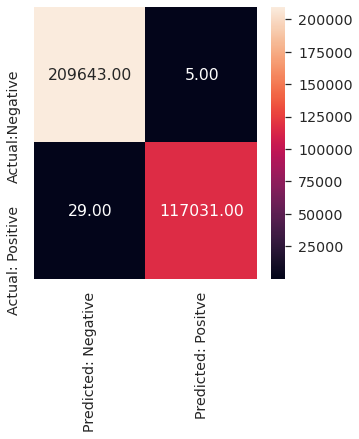

[False False False ... False False False]
34 sample miss-classified.
Miss-classified samples:
{'http_flood': 12, 'udp_scan': 2, 'normal.': 5, 'http_slow': 2, 'other': 7, 'icmp_ping_scan': 3, 'tcp_connection_scan': 3}


In [103]:
gs=GridSearchCV(estimator=RandomForestClassifier(n_jobs=2,random_state=42),param_grid=param_grid,cv=3,n_jobs=4,verbose=10)
gs.fit(x_train_val, y_train_val)
best_rf=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_rf.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

### SVM with sklearn

Fitting 1 folds for each of 12 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   54.3s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:  8.4min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 18.7min
[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed: 27.6min finished


Best parameter found:
{'C': 10, 'loss': 'squared_hinge'}
Best score on validation set: 0.9971864951768489
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    209648
         1.0       1.00      1.00      1.00    117060

    accuracy                           1.00    326708
   macro avg       1.00      1.00      1.00    326708
weighted avg       1.00      1.00      1.00    326708

Confusion matrix:
[[209237    411]
 [   534 116526]]


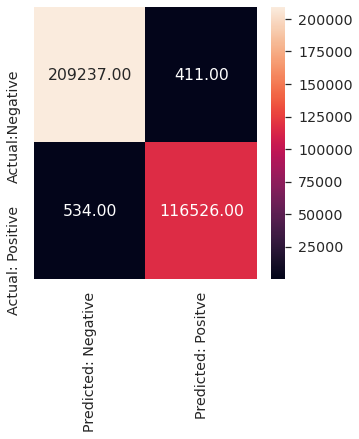

[False False False ... False False False]
945 sample miss-classified.
Miss-classified samples:
{'normal.': 411, 'http_flood': 226, 'other': 70, 'udp_flood': 9, 'tcp_null_scan': 52, 'udp_scan': 94, 'icmp_ping_scan': 79, 'http_slow': 1, 'tcp_connection_scan': 3}


In [104]:
from sklearn.svm import LinearSVC
param_grid={'C':[0.03, 0.1, 0.3, 1, 3, 10],
            'loss': ['hinge', 'squared_hinge']
            }

gs=GridSearchCV(estimator=sklearn.svm.LinearSVC(random_state=42, max_iter=1000, fit_intercept=True), 
                param_grid=param_grid,cv=ps, n_jobs= 2 ,verbose=10)
gs.fit(x_train_val,y_train_val)

best_svm=gs.best_estimator_
print('Best parameter found:',gs.best_params_,sep='\n')
print('Best score on validation set:',gs.best_score_)
y_test_pred=best_svm.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)

### Naive Bayes

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    209648
         1.0       0.99      0.98      0.99    117060

    accuracy                           0.99    326708
   macro avg       0.99      0.99      0.99    326708
weighted avg       0.99      0.99      0.99    326708

Confusion matrix:
[[209015    633]
 [  1775 115285]]


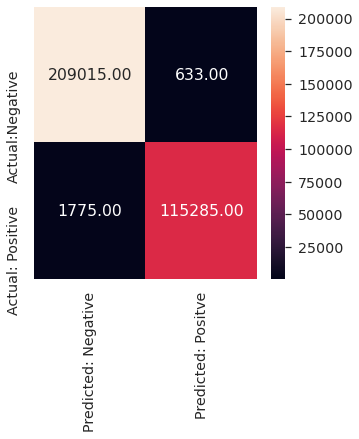

[False False False ... False False False]
2408 sample miss-classified.
Miss-classified samples:
{'http_flood': 323, 'normal.': 633, 'tcp_null_scan': 562, 'udp_flood': 133, 'tcp_connection_scan': 41, 'tcp_fin_flood': 33, 'udp_scan': 203, 'other': 296, 'icmp_ping_scan': 182, 'http_slow': 2}


In [105]:
nb_clf=GaussianNB()
nb_clf.fit(x_train_val, y_train_val)
y_test_pred=nb_clf.predict(x_test)
evaluate(y_test, y_test_pred, roc=False, labels_detail=y_test_detail)